# Data Science and Business Analytics - TSF

## Task 1 : Prediction using Supervised ML

<br>


**AIM** : Predict the percentage of a student based on the number of study hours <br>
**LANGUAGE USED** : Python 3 <br>
**IDE** : Jupyter Notebook <br>
**FORM** : Linear Regression <br>
**AUTHOR** : Keshav Krishna Kumar <br>

<br>

## *Importing the Dataset*

In [ ]:
# import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#Reading the Data
url = "http://bit.ly/w-data"
stud_data = pd.read_csv(url)
print("Data has been Imported Successfully")
stud_data.head(10)

Data has been Imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [17]:
#some calculations from the data
stud_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [13]:
#data cleaning is not required here since there is no duplication or missing values
stud_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

<br>

## *Plotting the Dataset* 


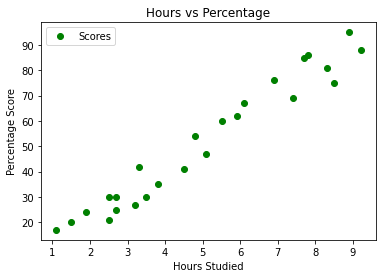

In [26]:
# Plotting the distribution of scores via a 2D graph

stud_data.plot(x='Hours', y='Scores', style='go')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### We can see here that, the graph shows a positive linear relation between the Percentage scored ( Y ) and Number of hours studied ( X ) 

<br>


## *Preparing the Dataset*


In [32]:
# Dividing the data into Attributes and Labels ( Input and Output )

X = stud_data.iloc[:, :-1].values  
Y = stud_data.iloc[:, 1].values

In [29]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [33]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

<br>

In [34]:
#Splitting Data into Training and Test Sets using Scikit-Learn's built-in train_test_split() method
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0)

In [35]:
#Displaying the Train Datasets
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [37]:
Y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [38]:
#Displaying the Test Datasets
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [39]:
Y_test

array([20, 27, 69, 30, 62], dtype=int64)

## *Training the Algorithm*

In [41]:
from sklearn.linear_model import LinearRegression 

regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

print("Training is complete.")


Training is complete.


<br>

## *Visualizing the Model*

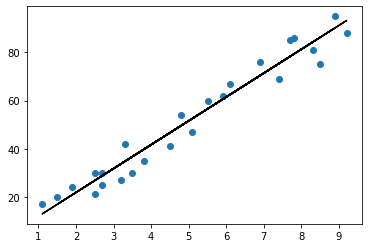

In [43]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, color='black');
plt.show()

<br>


## *Making Predictions*

In [47]:
# Making some predictions now that the model is trained
print(X_test) # Testing data - In Hours
Y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [48]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [49]:
# Testing with given data of 9.25 hrs/ day

hours = 9.25
own_pred = regressor.predict([[hours]])
print(f"No of Hours = {hours}")
print(f"Predicted Score = {own_pred[0]}")

No of Hours = 9.25
Predicted Score = 93.69173248737538


#### As we can see, the predicted score for 9.25 hours of Study is approximately 94

<br>

## *Evaluating the Model*

In [50]:
# Evaluating the Performance of the Algorithm
# Metric Used - Mean Absolute Error
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error: 4.183859899002975


<br>

### The task has been completed.